## GB & neighbors PV Cut Scenario due to Volcanic Eruption with 130 €/t CO2 price

In [1]:
import pypsa 
import matplotlib.pyplot as plt
plt.style.use("bmh")
import pandas as pd
from pypsa.plot import add_legend_patches
from matplotlib.patches import Patch
import gurobipy
import cartopy.crs as ccrs
from pypsa.optimization import optimize
import matplotlib.cm as cm
import numpy as np
import xarray as xr
import seaborn as sns
import os

pd.set_option("display.max_rows", None)  # Display all rows
pd.set_option("display.max_columns", None)  # Display all columns


## Import Networks

In [40]:
country = 'ES'
scenario = 'wind'
buses = 8
reductionto = '0_5'
red_int = 0.5 
duration = 180
red_dev = 0.25
dur_dev = 90

In [41]:
def sanitize_variable_name(file_name):
    # Replace invalid characters for variable names
    sanitized_name = file_name.replace('.', '_')
    sanitized_name = sanitized_name.replace('-', '_')
    if file_name == 0.0:
        sanitized_name = int(file_name)
    return sanitized_name

mod_names = []
def import_models(directory):
    nc_files = [
        f for f in os.listdir(directory)
        if f.endswith('.nc') and country in f and (scenario in f or f.endswith('solved.nc'))
    ]
    
    for file in nc_files:
        file_path = os.path.join(directory, file)
        base_name = os.path.splitext(file)[0]
        sanitized_name = sanitize_variable_name(base_name)
        dataset = pypsa.Network(file_path)
        globals()[sanitized_name] = dataset
        mod_names.append(sanitized_name)
        # Optionally print to verify
        print(f"Loaded {sanitized_name}")

# Example usage
directory = 'c:\\Users\\Jeremy\\Documents\\MasterThesis\\Models\\backup\\20240609_ES_168h_inv all countries'
import_models(directory)


INFO:pypsa.io:Imported network ES_8_1.0_base_roll_solved.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_base_roll_solved


INFO:pypsa.io:Imported network ES_8_1.0_base_solved.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_base_solved


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.25_180_inv.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_25_180_inv


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.25_180_invroll.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_25_180_invroll


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.25_180_noinv.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_25_180_noinv


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.25_180_noinvroll.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_25_180_noinvroll


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.25_270_inv.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_25_270_inv


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.25_270_invroll.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_25_270_invroll


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.25_270_noinv.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_25_270_noinv


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.25_270_noinvroll.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_25_270_noinvroll


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.25_90_inv.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_25_90_inv


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.25_90_invroll.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_25_90_invroll


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.25_90_noinv.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_25_90_noinv


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.25_90_noinvroll.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_25_90_noinvroll


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.5_180_inv.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_5_180_inv


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.5_180_invroll.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_5_180_invroll


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.5_180_noinv.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_5_180_noinv


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.5_180_noinvroll.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_5_180_noinvroll


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.5_270_inv.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_5_270_inv


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.5_270_invroll.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_5_270_invroll


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.5_270_noinv.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_5_270_noinv


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.5_270_noinvroll.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_5_270_noinvroll


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.5_90_inv.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_5_90_inv


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.5_90_invroll.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_5_90_invroll


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.5_90_noinv.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_5_90_noinv


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.5_90_noinvroll.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_5_90_noinvroll


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.75_180_inv.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_75_180_inv


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.75_180_invroll.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_75_180_invroll


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.75_180_noinv.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_75_180_noinv


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.75_180_noinvroll.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_75_180_noinvroll


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.75_270_inv.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_75_270_inv


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.75_270_invroll.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_75_270_invroll


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.75_270_noinv.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_75_270_noinv


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.75_270_noinvroll.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_75_270_noinvroll


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.75_90_inv.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_75_90_inv


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.75_90_invroll.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_75_90_invroll


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.75_90_noinv.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_75_90_noinv


INFO:pypsa.io:Imported network ES_8_1.0_wind_0.75_90_noinvroll.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_0_wind_0_75_90_noinvroll


INFO:pypsa.io:Imported network ES_8_1.5_base_roll_solved.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_base_roll_solved


INFO:pypsa.io:Imported network ES_8_1.5_base_solved.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_base_solved


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.25_180_inv.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_25_180_inv


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.25_180_invroll.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_25_180_invroll


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.25_180_noinv.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_25_180_noinv


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.25_180_noinvroll.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_25_180_noinvroll


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.25_270_inv.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_25_270_inv


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.25_270_invroll.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_25_270_invroll


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.25_270_noinv.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_25_270_noinv


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.25_270_noinvroll.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_25_270_noinvroll


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.25_90_inv.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_25_90_inv


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.25_90_invroll.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_25_90_invroll


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.25_90_noinv.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_25_90_noinv


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.25_90_noinvroll.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_25_90_noinvroll


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.5_180_inv.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_5_180_inv


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.5_180_invroll.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_5_180_invroll


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.5_180_noinv.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_5_180_noinv


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.5_180_noinvroll.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_5_180_noinvroll


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.5_270_inv.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_5_270_inv


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.5_270_invroll.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_5_270_invroll


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.5_270_noinv.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_5_270_noinv


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.5_270_noinvroll.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_5_270_noinvroll


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.5_90_inv.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_5_90_inv


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.5_90_invroll.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_5_90_invroll


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.5_90_noinv.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_5_90_noinv


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.5_90_noinvroll.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_5_90_noinvroll


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.75_180_inv.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_75_180_inv


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.75_180_invroll.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_75_180_invroll


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.75_180_noinv.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_75_180_noinv


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.75_180_noinvroll.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_75_180_noinvroll


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.75_270_inv.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_75_270_inv


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.75_270_invroll.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_75_270_invroll


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.75_270_noinv.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_75_270_noinv


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.75_270_noinvroll.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_75_270_noinvroll


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.75_90_inv.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_75_90_inv


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.75_90_invroll.nc has buses, carriers, generators, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_75_90_invroll


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.75_90_noinv.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_75_90_noinv


INFO:pypsa.io:Imported network ES_8_1.5_wind_0.75_90_noinvroll.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


Loaded ES_8_1_5_wind_0_75_90_noinvroll


# Installed Capacities

In [42]:
color_map = {row.name: row['color'] for _, row in globals()[f'{country}_{buses}_1_5_base_solved'].carriers.iterrows()}

In [43]:
def plot_installed_cap_models(cap, xlegend, df1,df2, df3=None, df4=None):
    # Adjust bar_width based on presence of df3 and df4
    if df3 is not None and df4 is not None:
        bar_width = 0.2
    else:
        bar_width = 0.35

    # Setting up indices
    indices = np.arange(len(df1.index))
    
    if df3 is not None and df4 is not None:
        base_indices = indices - 1.5 * bar_width  # Shift to the leftmost
        basetrans_indices = indices - 0.5 * bar_width  # Shift slightly left
        inv_indices = indices + 0.5 * bar_width  # Shift slightly right
        invtrans_indices = indices + 1.5 * bar_width  # Shift to the rightmost
    elif df3 is not None:
        base_indices = indices - bar_width  # Shift to the left
        basetrans_indices = indices  # No shift
        inv_indices = indices + bar_width  # Shift to the right
        invtrans_indices = None
    else:
        base_indices = indices - bar_width / 2  # Shift slightly to the left
        basetrans_indices = indices + bar_width / 2  # Shift slightly to the right
        inv_indices = None
        invtrans_indices = None

    # Plot configuration
    fig, ax = plt.subplots(figsize=(12,8))
    # Adjust the global font size
    plt.rcParams.update({'font.size': 14})
    # Helper function to plot stacked bars with consistent colors
    def plot_stack(ax, index, data, width, label_prefix, hatch_pattern):
        """Helper function to plot stacked bars."""
        bottom = np.zeros(len(index))
        for generator in data.columns:
            color = color_map.get(generator, "#7f7f7f")  # Default to grey if not specified
            ax.bar(index, data[generator], width, bottom=bottom, label=f'{generator}' if index is base_indices else "", color=color, hatch=hatch_pattern, edgecolor='black')
            bottom += data[generator]

    # Plot the base DataFrame (no hatching)
    plot_stack(ax, base_indices, df1, bar_width, 'Base', '')

    # Plot the inv DataFrame (with hatching)
    plot_stack(ax, basetrans_indices, df2, bar_width, 'Base_trans', '////')

    # Plot the exp DataFrame (with hatching '\\\\') if provided
    if inv_indices is not None:
        plot_stack(ax, inv_indices, df3, bar_width,'inv' ,'\\\\')

    # Plot the other DataFrame (with hatching '++') if provided
    if invtrans_indices is not None:
        plot_stack(ax, invtrans_indices, df4, bar_width, 'inv_trans','--')

    # Create custom legend entries
    custom_legend = [
        Patch(facecolor='none', edgecolor='black', label='Base 0 LE', hatch=''),
        Patch(facecolor='none', edgecolor='black', label='Inv 0 LE', hatch='////')
    ]
    if df3 is not None:
        custom_legend.append(Patch(facecolor='none', edgecolor='black', label='Base 50% LE', hatch='\\\\'))
    if df4 is not None:
        custom_legend.append(Patch(facecolor='none', edgecolor='black', label='Inv 50% LE', hatch='--'))

    # Combine generator-specific legend entries with custom entries for base/inv
    handles = ax.get_legend_handles_labels()[0] + custom_legend

    # Add legend outside the chart to the right
    ax.legend(handles=handles, bbox_to_anchor=(xlegend, 1), loc='upper left')

    # Adjust tick labels and grid
    ax.set_title(f'Installed {cap} Capacities')
    ax.set_xticks(indices)
    ax.set_xticklabels(df1.index, rotation=45)

    if cap == 'AC':
        ax.set_ylabel('Power Capacity [GVa]')
    else:
        ax.set_ylabel('Power Capacity [GW]')
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

    # Display the plot
    fig.tight_layout()

    # Save plot to the current working directory
    filename = f"analyis_cap_{cap}_{scenario}.png"
    output_path = os.path.join(os.getcwd(), filename)
    plt.savefig(output_path)
    plt.show()

## Installed Capacity of Generators in GW

In [44]:
def inst_gen_table(n):
    gen = n.generators
    gen['country'] = gen['bus'].str[:2]
    gen = gen.groupby(['country','carrier']).p_nom_opt.sum()/1000 #GW
    gen = gen.unstack()
    gen = gen.drop(columns=['load'],inplace=False)
    gen.fillna(0, inplace=True)
    return gen    

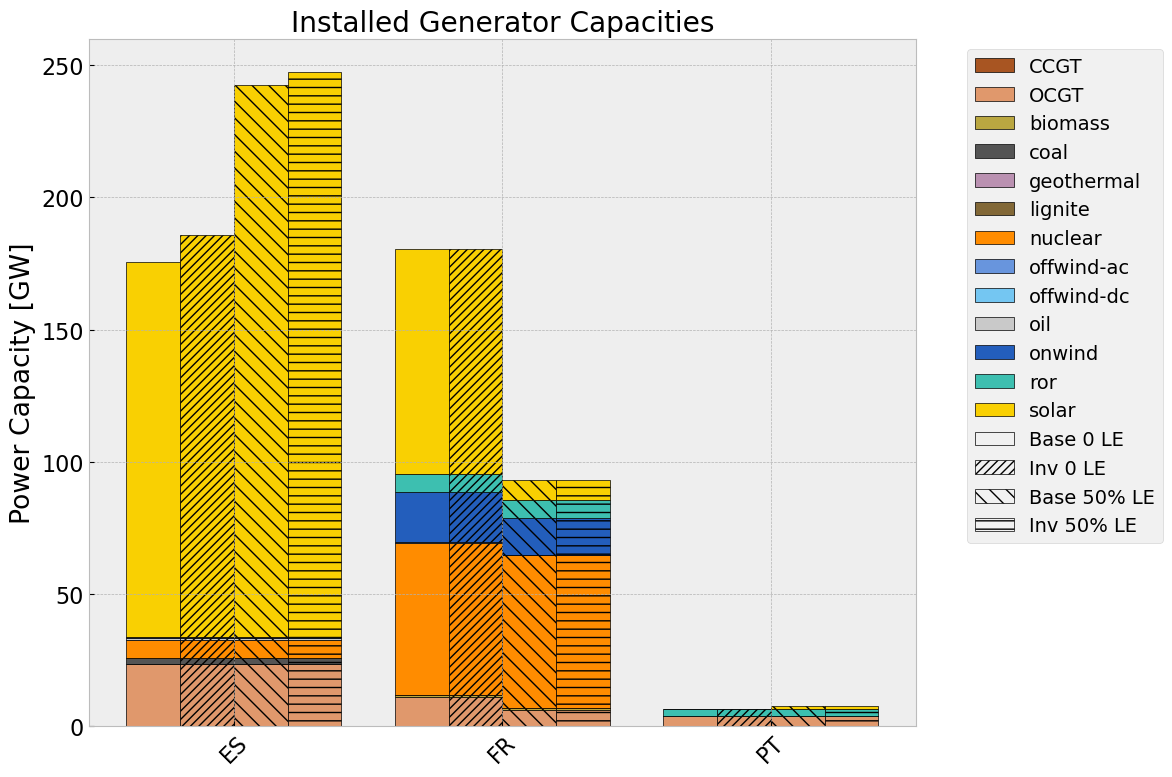

In [84]:
base_1_0_gen_df = inst_gen_table(globals()[f'{country}_{buses}_1_0_base_roll_solved'])
base_1_5_gen_df = inst_gen_table(globals()[f'{country}_{buses}_1_5_base_roll_solved'])
inv_1_0_gen_df = inst_gen_table(globals()[f'{country}_{buses}_1_0_{scenario}_{reductionto}_{duration}_invroll'])
inv_1_5_gen_df = inst_gen_table(globals()[f'{country}_{buses}_1_5_{scenario}_{reductionto}_{duration}_invroll'])

base_1_0_gen_df.fillna(0, inplace=True)
base_1_5_gen_df.fillna(0, inplace=True)
inv_1_0_gen_df.fillna(0, inplace=True)
inv_1_5_gen_df.fillna(0, inplace=True)

cap='Generator'
plot_installed_cap_models(cap, 1.05, base_1_0_gen_df, inv_1_0_gen_df,  base_1_5_gen_df,inv_1_5_gen_df)

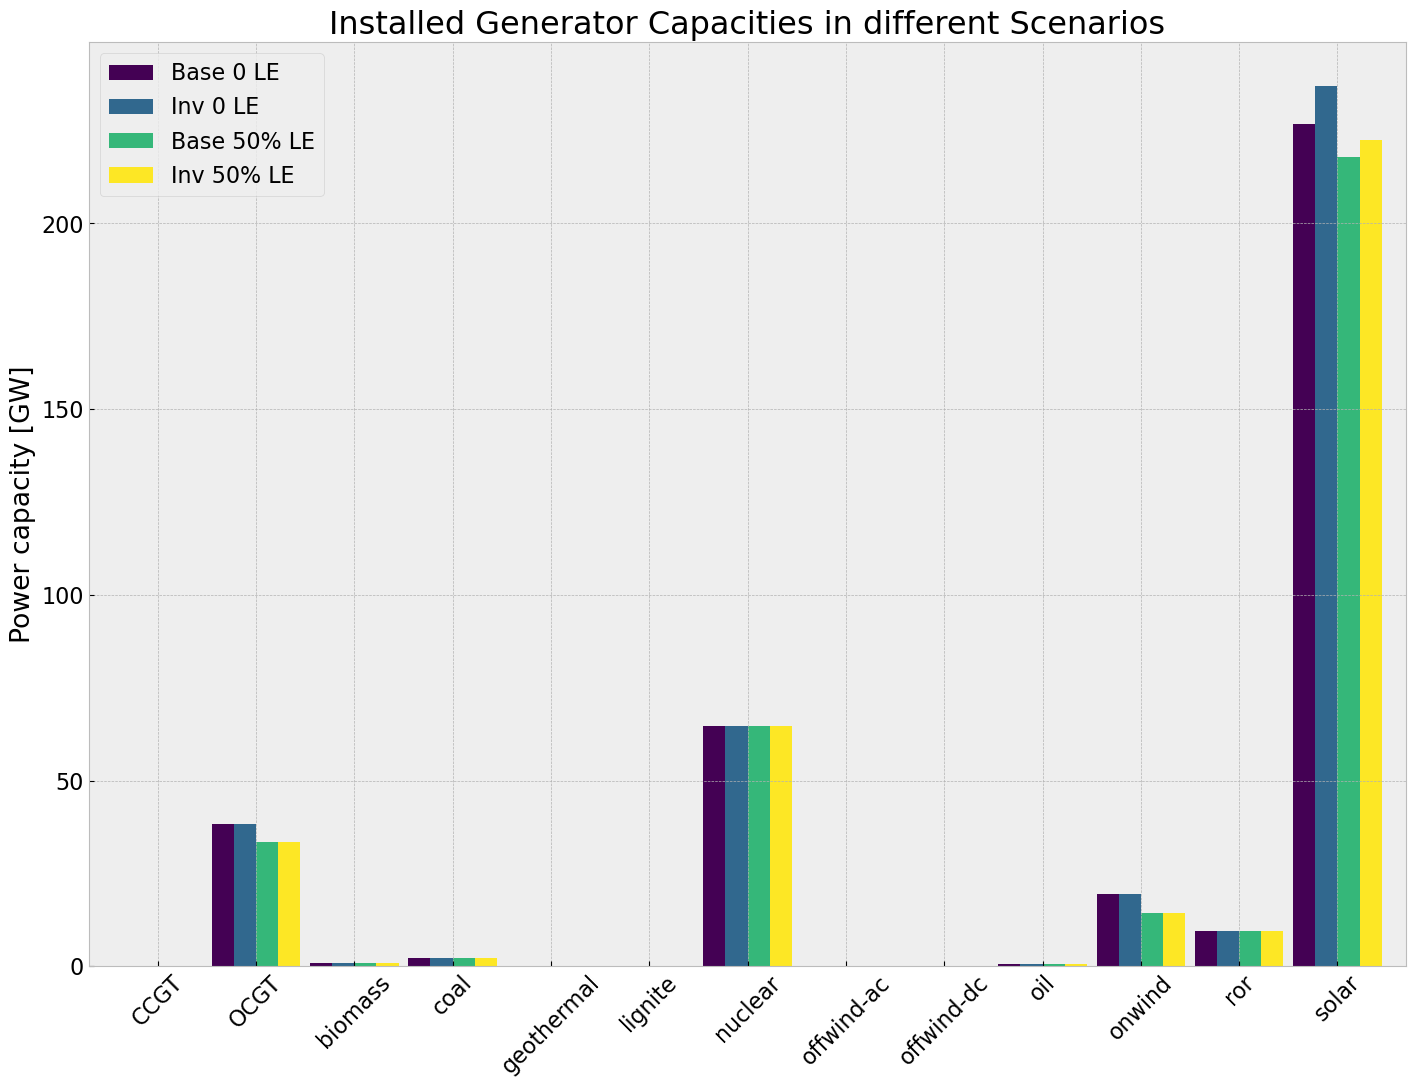

In [46]:
comp_inst_cap = pd.DataFrame(index=base_1_0_gen_df.columns)

comp_inst_cap["Base 0 LE"] = base_1_0_gen_df.sum() #GW
comp_inst_cap["Inv 0 LE"] = inv_1_0_gen_df.sum() #GW 
comp_inst_cap["Base 50% LE"] = base_1_5_gen_df.sum() #GW
comp_inst_cap["Inv 50% LE"] = inv_1_5_gen_df.sum() #GW 

#comp_inst_cap.rename(index = {"coal": "Coal"}, inplace=True)
#comp_inst_cap.rename(index = {"OCGT": "Open-Cycle Gas"}, inplace=True)
#comp_inst_cap.rename(index = {"CCGT": "Closed-Cycle Gas"}, inplace=True)
#comp_inst_cap.rename(index = {"ror": "Run of River"}, inplace=True)
#comp_inst_cap.rename(index = {"offwind-ac": "Offshore Wind AC"}, inplace=True)
#comp_inst_cap.rename(index = {"offwind-dc": "Offshore Wind DC"}, inplace=True)
#comp_inst_cap.rename(index = {"onwind": "Onshore Wind"}, inplace=True)
#comp_inst_cap.rename(index = {"solar": "Solar"}, inplace=True)
#comp_inst_cap.rename(index = {"oil": "Oil"}, inplace=True)
#comp_inst_cap.rename(index = {"geothermal": "Geothermal"}, inplace=True)
#comp_inst_cap.rename(index = {"nuclear": "Nuclear"}, inplace=True)
#comp_inst_cap.rename(index = {"biomass": "Biomass"}, inplace=True)
#comp_inst_cap.rename(index = {"lignite": "Lignite"}, inplace=True)

comp_inst_cap.fillna(0, inplace=True)
# Adjust the global font size
plt.rcParams.update({'font.size': 16})

ax = comp_inst_cap.plot.bar(figsize=(17,12),
                        color=cm.viridis(np.linspace(0, 1, len(comp_inst_cap.columns))),
                        grid=True,
                        xlabel="",
                        ylabel="Power capacity [GW]",
                        title=f"Installed Generator Capacities in different Scenarios",
                        #ylim=[0,350],
                        width=0.9
)

ax.set_xticklabels(comp_inst_cap.index, rotation=45)

plt.show()

## Installed Capacity of Storage Units in GW

In [47]:
def inst_store_table(n):
    storage = n.storage_units
    storage['country'] = storage['bus'].str[:2]
    store = storage.groupby(['country','carrier']).p_nom_opt.sum()/1000 #GW
    store.fillna(0, inplace=True)
    return store    

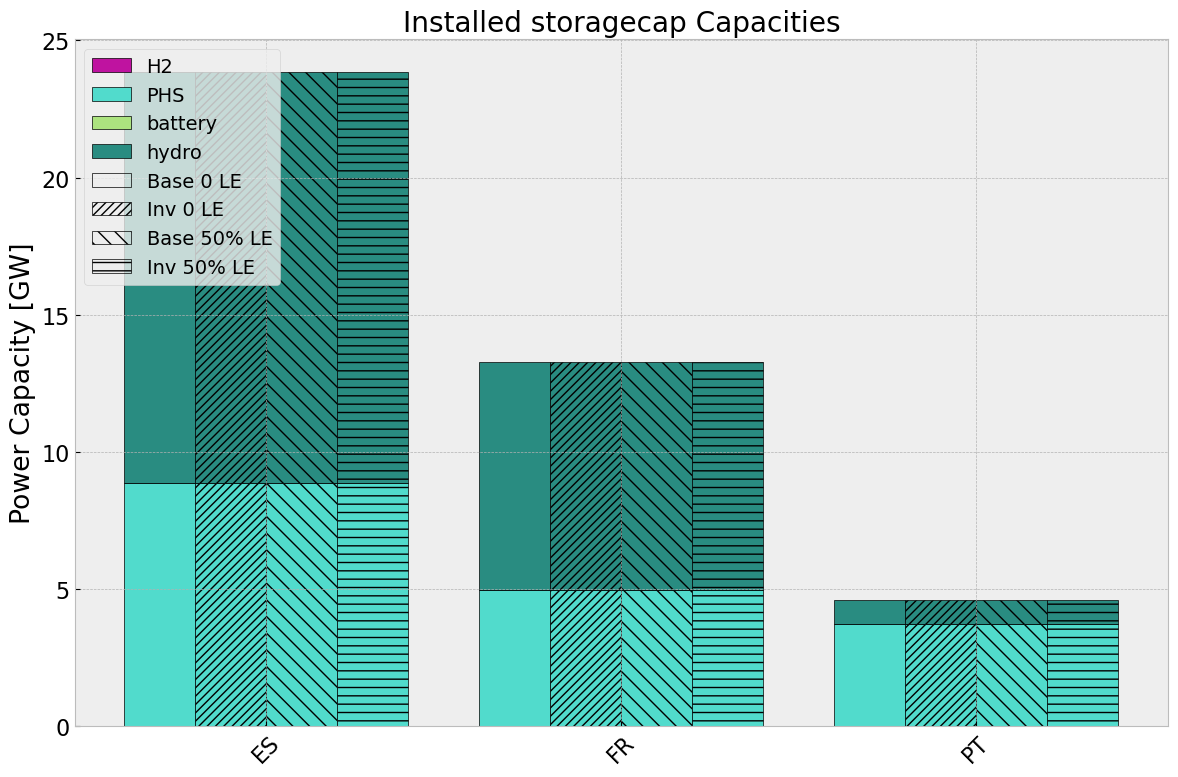

In [48]:
base_1_0_sto_df = inst_store_table(globals()[f'{country}_{buses}_1_0_base_solved']).unstack()
base_1_5_sto_df = inst_store_table(globals()[f'{country}_{buses}_1_5_base_solved']).unstack()
inv_1_0_sto_df = inst_store_table(globals()[f'{country}_{buses}_1_0_{scenario}_{reductionto}_{duration}_inv']).unstack()
inv_1_5_sto_df = inst_store_table(globals()[f'{country}_{buses}_1_5_{scenario}_{reductionto}_{duration}_inv']).unstack()

base_1_0_sto_df.fillna(0, inplace=True)
base_1_5_sto_df.fillna(0, inplace=True)
inv_1_0_sto_df.fillna(0, inplace=True)
inv_1_5_sto_df.fillna(0, inplace=True)

cap='storagecap'
plot_installed_cap_models(cap, 0, base_1_0_sto_df, inv_1_0_sto_df, base_1_5_sto_df,inv_1_5_sto_df)

## Installed Capacity of Transmission Lines in GVA for AC and GW for DC

### AC

In [49]:
def inst_line_table(n, cap):
        
    if cap == 'AC':
        cap_df = n.lines
        cap_df['country'] = cap_df['bus0'].str[:2]
        cap_df = cap_df.groupby(['country', 'carrier']).s_nom_opt.sum()
        cap_df.fillna(0, inplace=True)
        cap_df = cap_df.unstack().div(1e3) #GVA
    else:
        cap_df = n.links #DC
        cap_df['country'] = cap_df['bus0'].str[:2]
        cap_df = cap_df.groupby(['country', 'carrier']).p_nom_opt.sum()
        cap_df.fillna(0, inplace=True)
        cap_df = cap_df.unstack().div(1e3) #GW

    #create empty df
    trans_df = {
        'Country' : n.buses.country.unique(),
        cap: np.zeros(len(n.buses.country.unique())),
        }

    trans_df = pd.DataFrame(trans_df)
    trans_df.set_index('Country', inplace=True)


    #fill empty df with AC Cap
    for index, row in trans_df.iterrows():
        if index in cap_df.index:
            try:
                trans_df.loc[index, cap] = cap_df.loc[index, cap]
            except KeyError: 
                trans_df.loc[index, cap] = 0
        else:
            trans_df.loc[index, cap] = 0

    return trans_df    

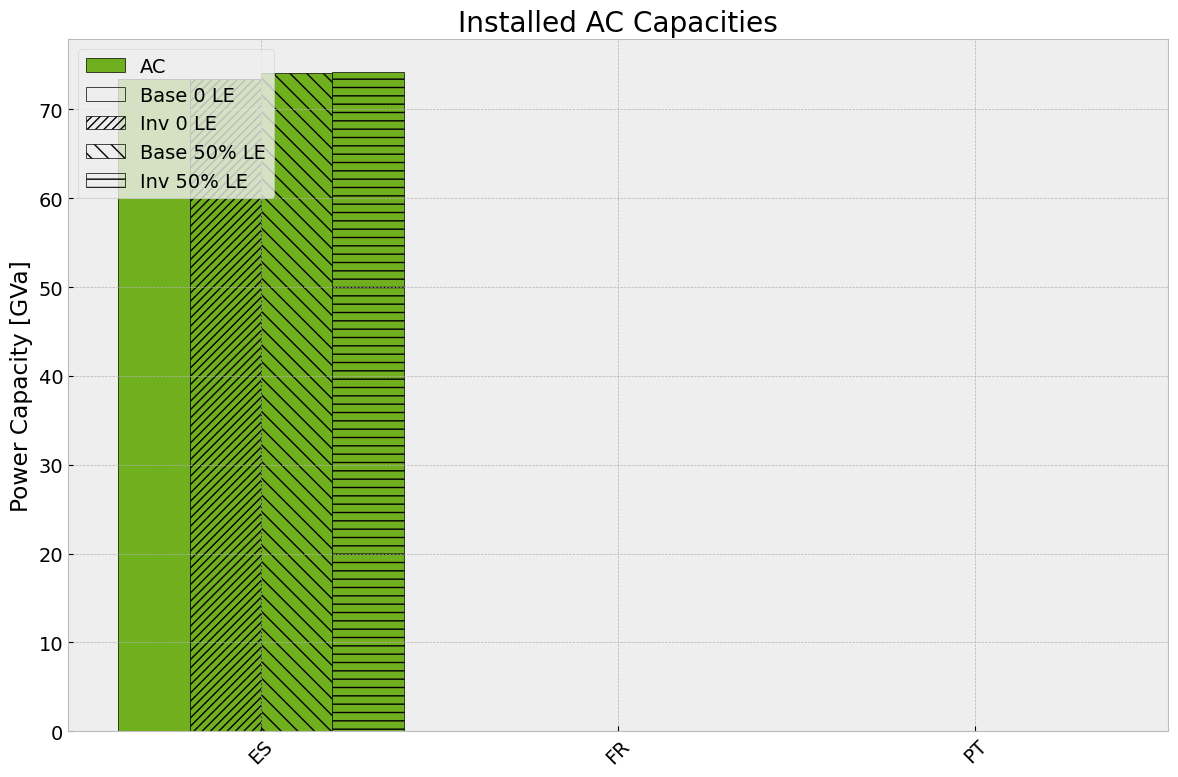

In [50]:
cap='AC'
base_1_0_ac_df = inst_line_table(globals()[f'{country}_{buses}_1_0_base_solved'], cap)
base_1_5_ac_df = inst_line_table(globals()[f'{country}_{buses}_1_5_base_solved'], cap)
inv_1_0_ac_df = inst_line_table(globals()[f'{country}_{buses}_1_0_{scenario}_{reductionto}_{duration}_inv'], cap)
inv_1_5_ac_df = inst_line_table(globals()[f'{country}_{buses}_1_5_{scenario}_{reductionto}_{duration}_inv'], cap)

plot_installed_cap_models(cap, 0, base_1_0_ac_df, inv_1_0_ac_df, base_1_5_ac_df, inv_1_5_ac_df)

In [51]:
def allow_inv(n1,n):
    #delete line expansion global constraint
    if 'lv_limit' in n1.global_constraints.index:
        n1.global_constraints = n1.global_constraints.drop('lv_limit')

    #set the optimal capacity of generators from the base scenario as the new minimum capacity 
    for index, value in n1.generators.p_nom_extendable.items():
        if value:  
            n1.generators.at[index, 'p_nom_min'] = n.generators.at[index, 'p_nom_opt']
            n1.generators.at[index, 'p_nom_extendable'] = True

    #set the optimal capacity of storage units from the base scenario as the new minimum capacity 
    for index, value in n1.storage_units.p_nom_extendable.items():
        if value:  
            n1.storage_units.at[index, 'p_nom_min'] = n.storage_units.at[index, 'p_nom_opt']
            n1.storage_units.at[index, 'p_nom_extendbale'] = True

    #set the optimal capacity of lines from the base scenario as the new minimum capacity 
    for index, value in n1.lines.s_nom_extendable.items():
        n1.lines.at[index, 's_nom_extendable'] = True
        n1.lines.at[index, 's_nom_min'] = n.lines.at[index, 's_nom_opt']
            

    #set the optimal capacity of links from the base scenario as the new minimum capacity 
    for index, value in n1.links.p_nom_extendable.items():
        n1.links.at[index, 'p_nom_extendable'] = True
        n1.links.at[index, 'p_nom_min'] = n.links.at[index, 'p_nom_opt'] 
            

### DC

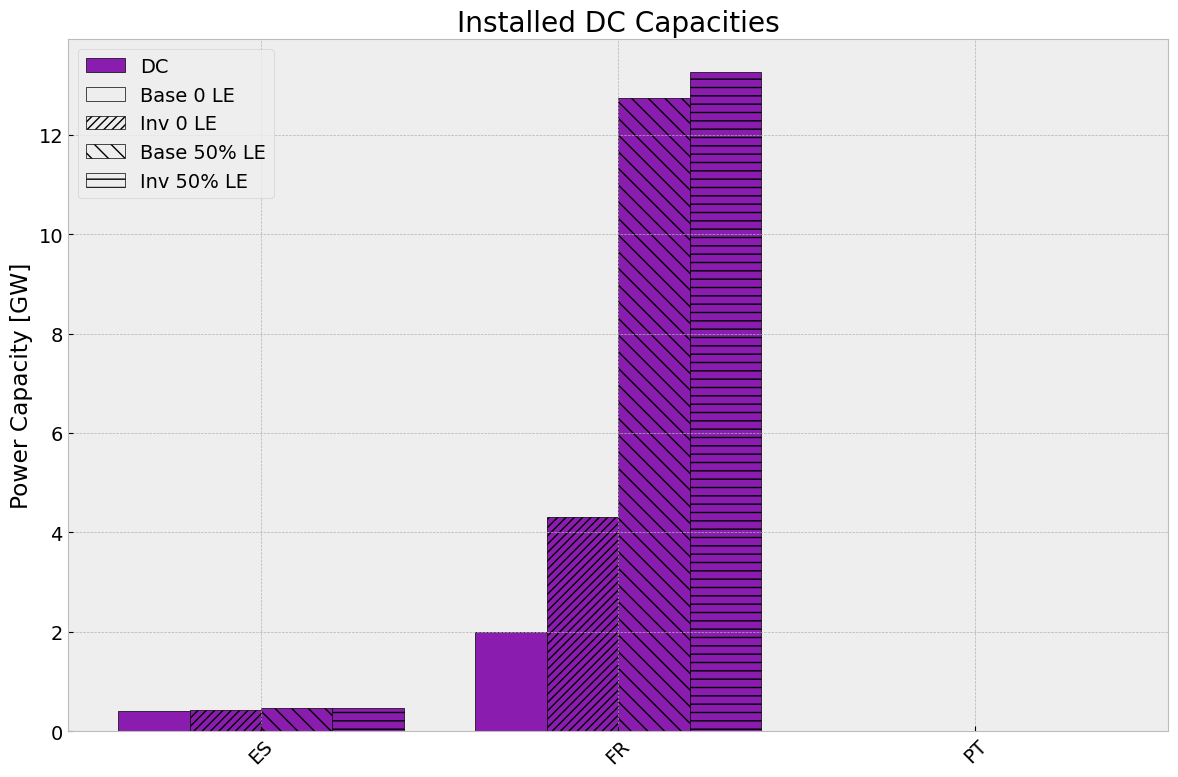

In [52]:
cap = 'DC'

base_1_0_dc_df = inst_line_table(globals()[f'{country}_{buses}_1_0_base_solved'], cap)
base_1_5_dc_df = inst_line_table(globals()[f'{country}_{buses}_1_5_base_solved'], cap)
inv_1_0_dc_df = inst_line_table(globals()[f'{country}_{buses}_1_0_{scenario}_{reductionto}_{duration}_inv'], cap)
inv_1_5_dc_df = inst_line_table(globals()[f'{country}_{buses}_1_5_{scenario}_{reductionto}_{duration}_inv'], cap)

plot_installed_cap_models(cap, 0, base_1_0_dc_df, inv_1_0_dc_df, base_1_5_dc_df, inv_1_5_dc_df)

# Generated Electricity

In [53]:
def gen_power_table_country(n):

    carrier_gen = list(n.generators.carrier.unique())
    carrier_sto = list(n.storage_units.carrier.unique())
    carrier = carrier_gen + carrier_sto
    region = n.generators.bus.unique()

    gen_df = n.generators[["carrier","bus","p_nom_opt"]]
    sto_df = n.storage_units[["carrier","bus","p_nom_opt"]]
    tot_df = pd.concat([gen_df, sto_df])
    tot_series = pd.Series(index = tot_df.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

    gen_sto = n.storage_units_t.p.sum()
    gen_gen = n.generators_t.p.sum()
    gen = pd.concat([gen_sto, gen_gen])
    gen = gen.clip(lower=0)

    for r in region:
            for tech in carrier:
                key = f"{r} {tech}"
                if key in gen.index:
                    try:
                        tot_series.loc[r, tech] = gen[key]
                    #print(generations.loc[r, tech])
                    except KeyError:
                        print('error')
    #tot_series.fillna(0, inplace=True)

    tot_df = (tot_series.unstack()/1000)
    tot_df.fillna(0,inplace = True)


    
    tot_df['country'] = tot_df.index.str[:2]
    tot_df = tot_df.groupby(['country']).sum()  

    return tot_df


In [54]:
base_1_0_generation_df = gen_power_table_country(globals()[f'{country}_{buses}_1_0_base_roll_solved'])
base_1_5_generation_df = gen_power_table_country(globals()[f'{country}_{buses}_1_5_base_roll_solved'])
inv_1_0_generation_df = gen_power_table_country(globals()[f'{country}_{buses}_1_0_{scenario}_{reductionto}_{duration}_invroll'])
inv_1_5_generation_df = gen_power_table_country(globals()[f'{country}_{buses}_1_5_{scenario}_{reductionto}_{duration}_invroll'])
noinv_1_0_generation_df = gen_power_table_country(globals()[f'{country}_{buses}_1_0_{scenario}_{reductionto}_{duration}_noinvroll'])
noinv_1_5_generation_df = gen_power_table_country(globals()[f'{country}_{buses}_1_5_{scenario}_{reductionto}_{duration}_noinvroll'])


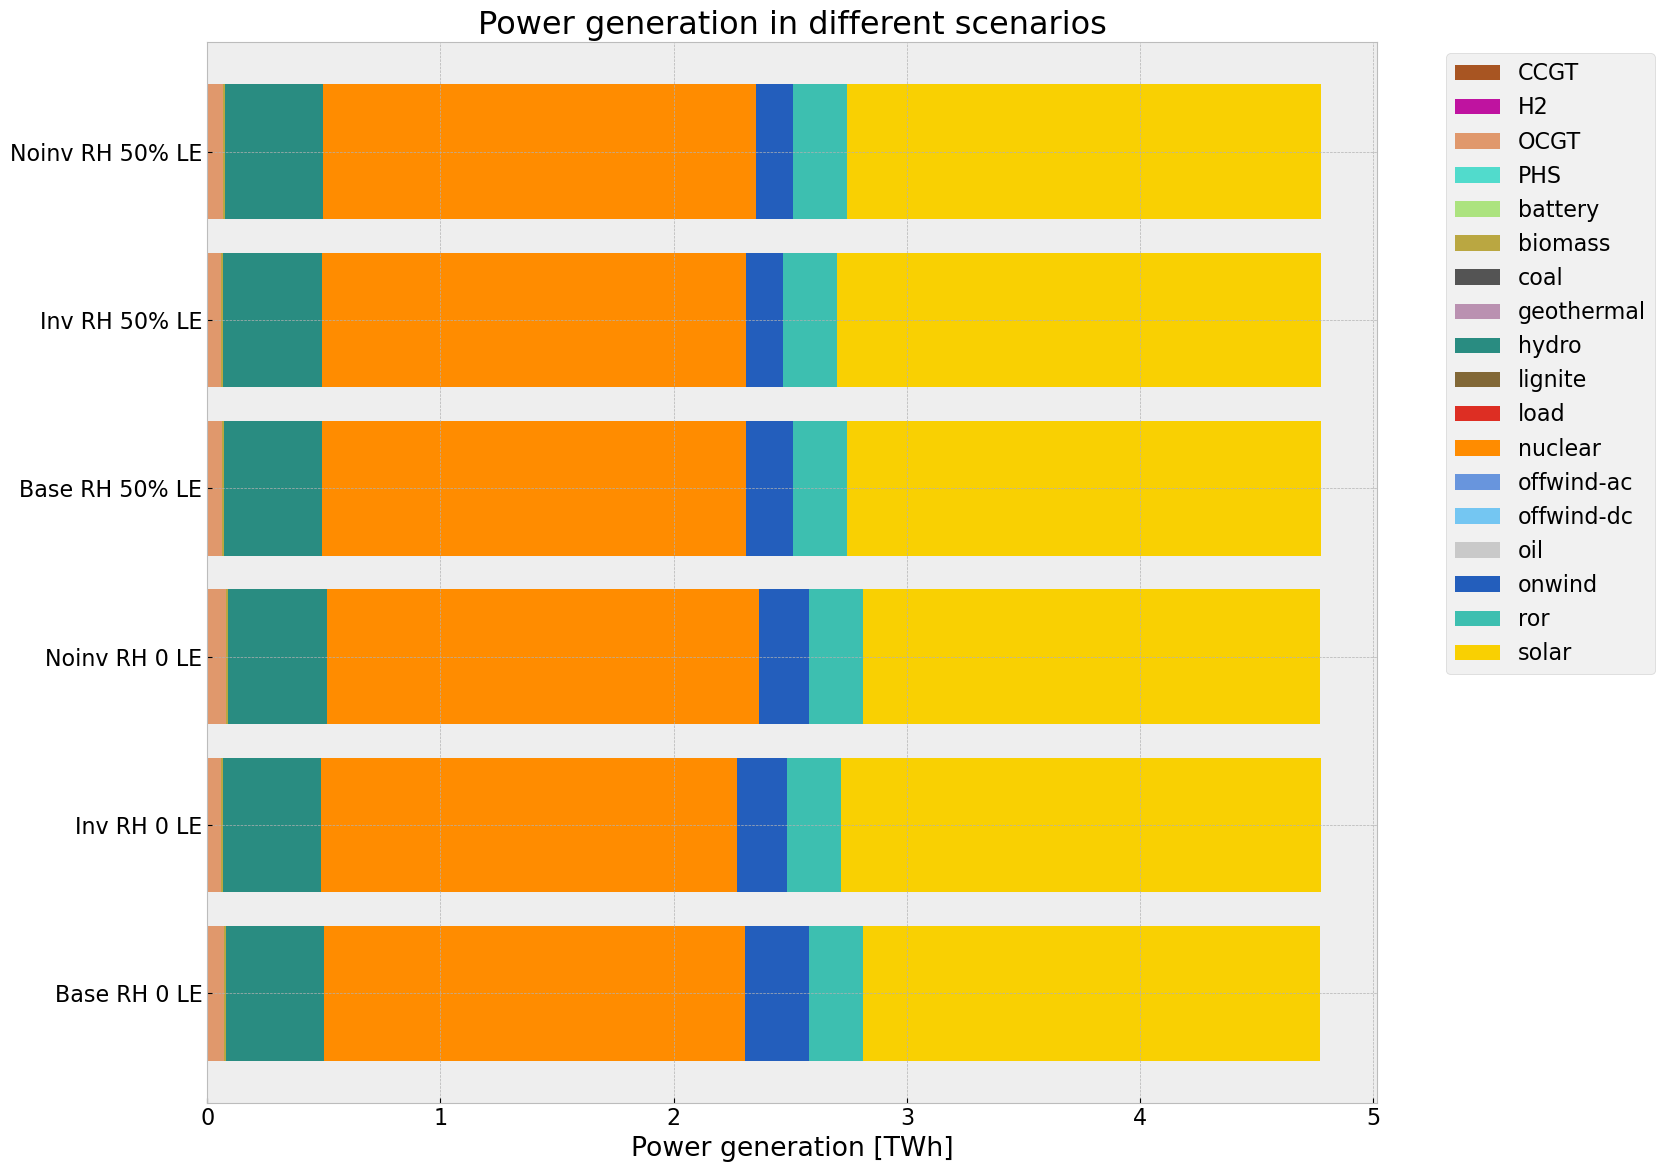

In [55]:
comp_gen_electr = pd.DataFrame(columns = base_1_0_generation_df.columns.tolist())

comp_gen_electr.loc["Base RH 0 LE"] = base_1_0_generation_df.sum().div(1e3) # TWh/a
comp_gen_electr.loc["Inv RH 0 LE"] = inv_1_0_generation_df.sum().div(1e3) # TWh/a
comp_gen_electr.loc["Noinv RH 0 LE"] = noinv_1_0_generation_df.sum().div(1e3) # TWh/a
comp_gen_electr.loc["Base RH 50% LE"] = base_1_5_generation_df.sum().div(1e3) # TWh/a
comp_gen_electr.loc["Inv RH 50% LE"] = inv_1_5_generation_df.sum().div(1e3) # TWh/a
comp_gen_electr.loc["Noinv RH 50% LE"] = noinv_1_5_generation_df.sum().div(1e3) # TWh/a

comp_gen_electr.fillna(0, inplace=True)

# Adjust the global font size
plt.rcParams.update({'font.size': 16})

comp_gen_electr.plot.barh(figsize=(17,12),
                        color=color_map,
                        grid=True,
                        stacked=True, 
                        ylabel="",
                        xlabel="Power generation [TWh]",
                        title=f"Power generation in different scenarios",
                        #xlim=[0,200],
                        width=0.8
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save plot to the current working directory
filename = "analysis_generation.png"
output_path = os.path.join(os.getcwd(), filename)
plt.savefig(output_path)

plt.show()

# System Cost

In [56]:
def system_cost(n, country_cost): #n.statistics.capex()
    #add column country in generaror, storage unit, lines and links
    for index, row in n.generators.iterrows():
        n.generators.at[index,'country'] = row['bus'][:2]

    for index, row in n.storage_units.iterrows():
        n.storage_units.at[index,'country'] = row['bus'][:2]

    for index, row in n.lines.iterrows():
        if country_cost in row['bus0'] or country_cost in row['bus1']:
            n.lines.at[index, 'country'] = country_cost
        else:
            n.lines.at[index,'country'] = row['bus0'][:2]

    for index, row in n.links.iterrows():
        if country_cost in row['bus0'] or country_cost in row['bus1']:
            n.links.at[index, 'country'] = country_cost
        else:
            n.links.at[index,'country'] = row['bus0'][:2]

    #calc opex and capex of the chosen country
    cost_df = pd.DataFrame(columns=['opex', 'capex'], index = n.carriers.index)

    opex = n.statistics.opex(comps=["Generator", "StorageUnit","Line","Link","Transformer"], groupby=["carrier","country"], aggregate_groups="sum").unstack()[country].fillna(0).droplevel(0)
    capex= n.statistics.capex(comps=["Generator", "StorageUnit","Line","Link","Transformer"], groupby=["carrier","country"], aggregate_groups="sum").unstack()[country].fillna(0).droplevel(0)

    for index, value in capex.items():
        cost_df.at[index, 'capex'] = value

    for index, value in opex.items():
        cost_df.at[index, 'opex'] = value

    cost_df = cost_df.fillna(0)
    system_cost = cost_df.sum(axis=1)/1e9 # Bill€
    return system_cost

In [57]:
#calculate the system cost for base RH, inv RH, and noinv RH models
for i in mod_names:
    if 'roll' in i and (i.endswith('roll_solved') or (reductionto in i and str(duration) in i)):
        print(i)
        globals()[f'system_cost_{i}'] = system_cost(globals()[i], country)

ES_8_1_0_base_roll_solved
ES_8_1_0_wind_0_5_180_invroll


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)


ES_8_1_0_wind_0_5_180_noinvroll
ES_8_1_5_base_roll_solved


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior,

ES_8_1_5_wind_0_5_180_invroll
ES_8_1_5_wind_0_5_180_noinvroll


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)


In [58]:
tech_comp = globals()[f'system_cost_{country}_{buses}_1_0_base_roll_solved'].index
comp_system_cost = pd.DataFrame(columns =tech_comp)

comp_system_cost.loc["Base RH 0 LE"]    = globals()[f'system_cost_{country}_{buses}_1_0_base_roll_solved']
comp_system_cost.loc["Inv RH 0 LE"]     = globals()[f'system_cost_{country}_{buses}_1_0_{scenario}_{reductionto}_{duration}_invroll']
comp_system_cost.loc["Noinv RH 0 LE"]   = globals()[f'system_cost_{country}_{buses}_1_0_{scenario}_{reductionto}_{duration}_noinvroll']
comp_system_cost.loc["Base RH 50% LE"]  = globals()[f'system_cost_{country}_{buses}_1_5_base_roll_solved']
comp_system_cost.loc["Inv RH 50% LE"]   = globals()[f'system_cost_{country}_{buses}_1_5_{scenario}_{reductionto}_{duration}_invroll']
comp_system_cost.loc["Noinv RH 50% LE"] = globals()[f'system_cost_{country}_{buses}_1_5_{scenario}_{reductionto}_{duration}_noinvroll']

comp_system_cost.drop('', axis=1, inplace=True)
comp_system_cost.fillna(0, inplace=True)

#move load shedding to the last col
# Specify the column name to move
column_to_move = 'load'

# Create a new list of column names without the column to move
new_columns = [col for col in comp_system_cost.columns if col != column_to_move]

# Append the column to move to the end
new_columns.append(column_to_move)

# Reorder the columns
comp_system_cost = comp_system_cost[new_columns]

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\3628952894.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if comp_system_cost.columns[i] == globals()[f'{country}_{buses}_1_0_base_roll_solved'].carriers.nice_name[j]:
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\3628952894.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors_comp.append(globals()[f'{country}_{buses}_1_0_base_roll_solved'].carriers.color[j])


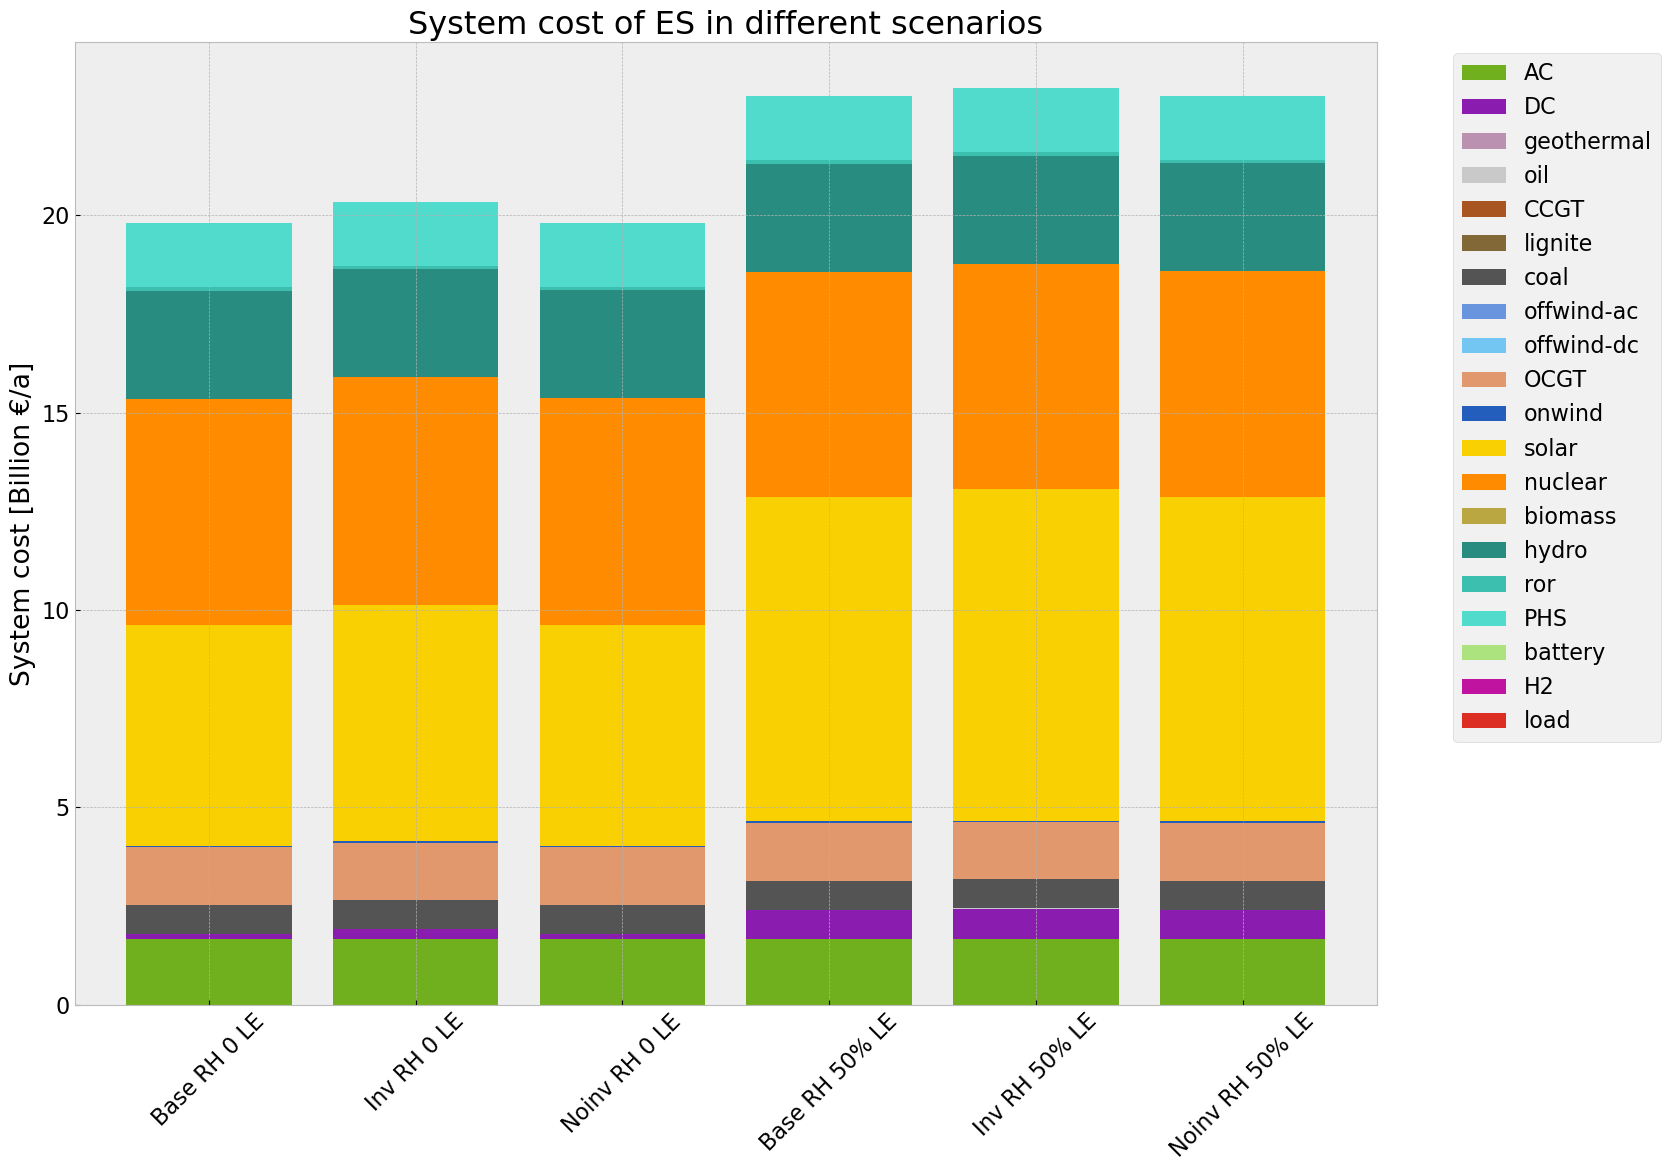

In [59]:
colors_comp = []

for i in range(len(comp_system_cost.columns)):
    for j in range(len(globals()[f'{country}_{buses}_1_0_base_roll_solved'].carriers.nice_name)):
        if comp_system_cost.columns[i] == globals()[f'{country}_{buses}_1_0_base_roll_solved'].carriers.nice_name[j]:
            colors_comp.append(globals()[f'{country}_{buses}_1_0_base_roll_solved'].carriers.color[j])
            #print(n.carriers.nice_name[j],comp_system_cost.columns[i],n.carriers.color[j])
            break  # break the inner loop once a match is found  

# Adjust the global font size
plt.rcParams.update({'font.size': 16})

ax = comp_system_cost.plot.bar(figsize=(17,12),
                        color=color_map,
                        grid=True,
                        stacked=True,
                        ylabel="System cost [Billion €/a]",
                        xlabel="",
                        title=f"System cost of {country} in different scenarios",
                        #xlim=[0,100],
                        width=0.8
)

# Rotate xtick labels to horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Move legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save plot to the current working directory
filename = f"analysis_system_cost_{country}.png"
output_path = os.path.join(os.getcwd(), filename)
plt.savefig(output_path)

plt.show()

### Total System Cost

In [60]:
def system_cost_tot(n): #n.statistics.capex()
    stat = n.statistics()
    tsc = stat['Capital Expenditure'] + stat['Operational Expenditure']
    return tsc.droplevel(0).div(1e9) # billion €/a

In [61]:
#calculate the system cost for base RH, inv RH, and noinv RH models
for i in mod_names:
    if 'roll' in i and (i.endswith('roll_solved') or (reductionto in i and str(duration) in i)):
        #print(i)
        globals()[f'system_cost_tot_{i}'] = system_cost_tot(globals()[i])

tech_comp = globals()[f'system_cost_tot_{country}_{buses}_1_0_base_roll_solved'].index
comp_system_cost_tot = pd.DataFrame(columns =tech_comp)

comp_system_cost_tot.loc["Base RH 0 LE"]    = globals()[f'system_cost_tot_{country}_{buses}_1_0_base_roll_solved']
comp_system_cost_tot.loc["Inv RH 0 LE"]     = globals()[f'system_cost_tot_{country}_{buses}_1_0_{scenario}_{reductionto}_{duration}_invroll']
comp_system_cost_tot.loc["Noinv RH 0 LE"]   = globals()[f'system_cost_tot_{country}_{buses}_1_0_{scenario}_{reductionto}_{duration}_noinvroll']
comp_system_cost_tot.loc["Base RH 50% LE"]  = globals()[f'system_cost_tot_{country}_{buses}_1_5_base_roll_solved']
comp_system_cost_tot.loc["Inv RH 50% LE"]   = globals()[f'system_cost_tot_{country}_{buses}_1_5_{scenario}_{reductionto}_{duration}_invroll']
comp_system_cost_tot.loc["Noinv RH 50% LE"] = globals()[f'system_cost_tot_{country}_{buses}_1_5_{scenario}_{reductionto}_{duration}_noinvroll']

comp_system_cost_tot.drop('-', axis=1, inplace=True)
comp_system_cost_tot.fillna(0, inplace=True)

#move load shedding to the last col
# Specify the column name to move
column_to_move = 'Load shedding'

# Create a new list of column names without the column to move
new_columns = [col for col in comp_system_cost_tot.columns if col != column_to_move]

# Append the column to move to the end
new_columns.append(column_to_move)

# Reorder the columns
comp_system_cost_tot = comp_system_cost_tot[new_columns]

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\3240920978.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if comp_system_cost_tot.columns[i] == globals()[f'{country}_{buses}_1_0_base_roll_solved'].carriers.nice_name[j]:
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\3240920978.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors_comp.append(globals()[f'{country}_{buses}_1_0_base_roll_solved'].carriers.color[j])


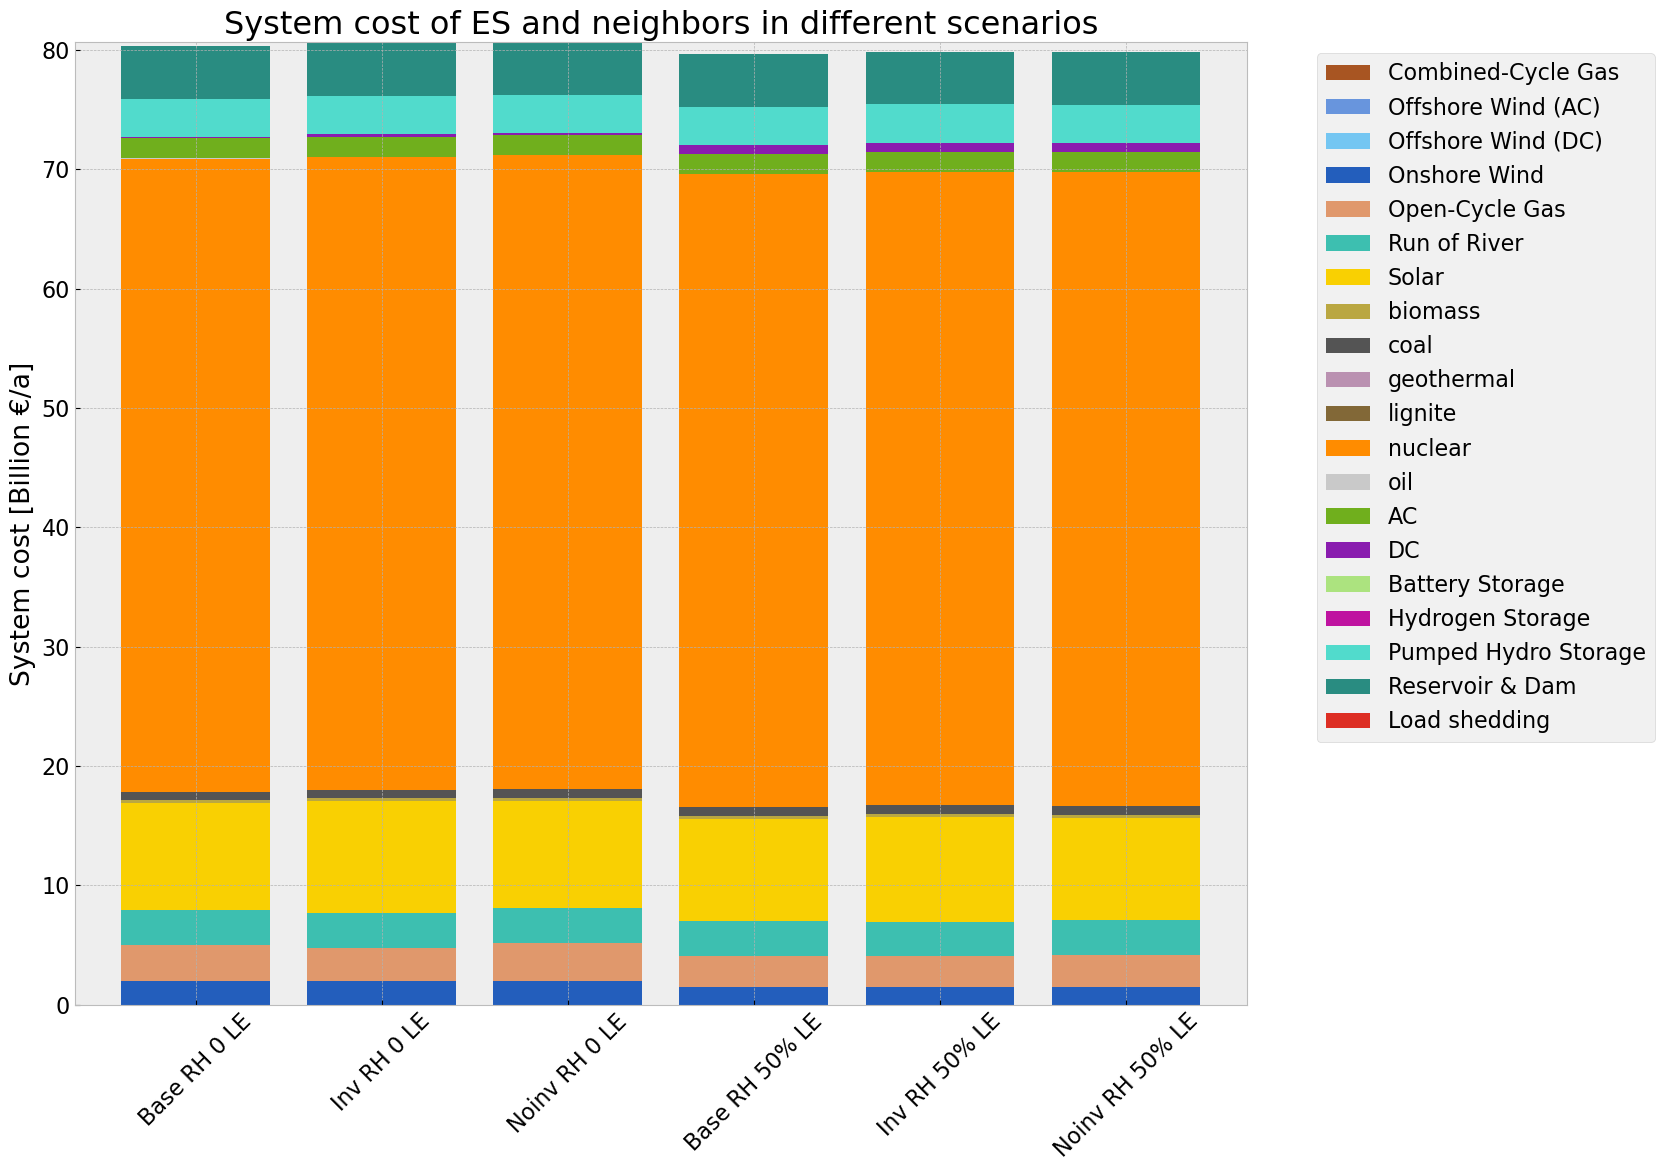

In [62]:
colors_comp = []

for i in range(len(comp_system_cost_tot.columns)):
    for j in range(len(globals()[f'{country}_{buses}_1_0_base_roll_solved'].carriers.nice_name)):
        if comp_system_cost_tot.columns[i] == globals()[f'{country}_{buses}_1_0_base_roll_solved'].carriers.nice_name[j]:
            colors_comp.append(globals()[f'{country}_{buses}_1_0_base_roll_solved'].carriers.color[j])
            #print(n.carriers.nice_name[j],comp_system_cost.columns[i],n.carriers.color[j])
            break  # break the inner loop once a match is found  

# Adjust the global font size
plt.rcParams.update({'font.size': 16})

ax = comp_system_cost_tot.plot.bar(figsize=(17,12),
                        color=colors_comp,
                        grid=True,
                        stacked=True,
                        ylabel="System cost [Billion €/a]",
                        xlabel="",
                        title=f"System cost of {country} and neighbors in different scenarios",
                        #xlim=[0,100],
                        width=0.8
)

# Rotate xtick labels to horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Move legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save plot to the current working directory
filename = "analysis_system_cost.png"
output_path = os.path.join(os.getcwd(), filename)
plt.savefig(output_path)

plt.show()

## Additional Cost vs Saved Cost

in the following plot the additional cost from investing in more capacities is compared with its cost saved when the contingency happens.

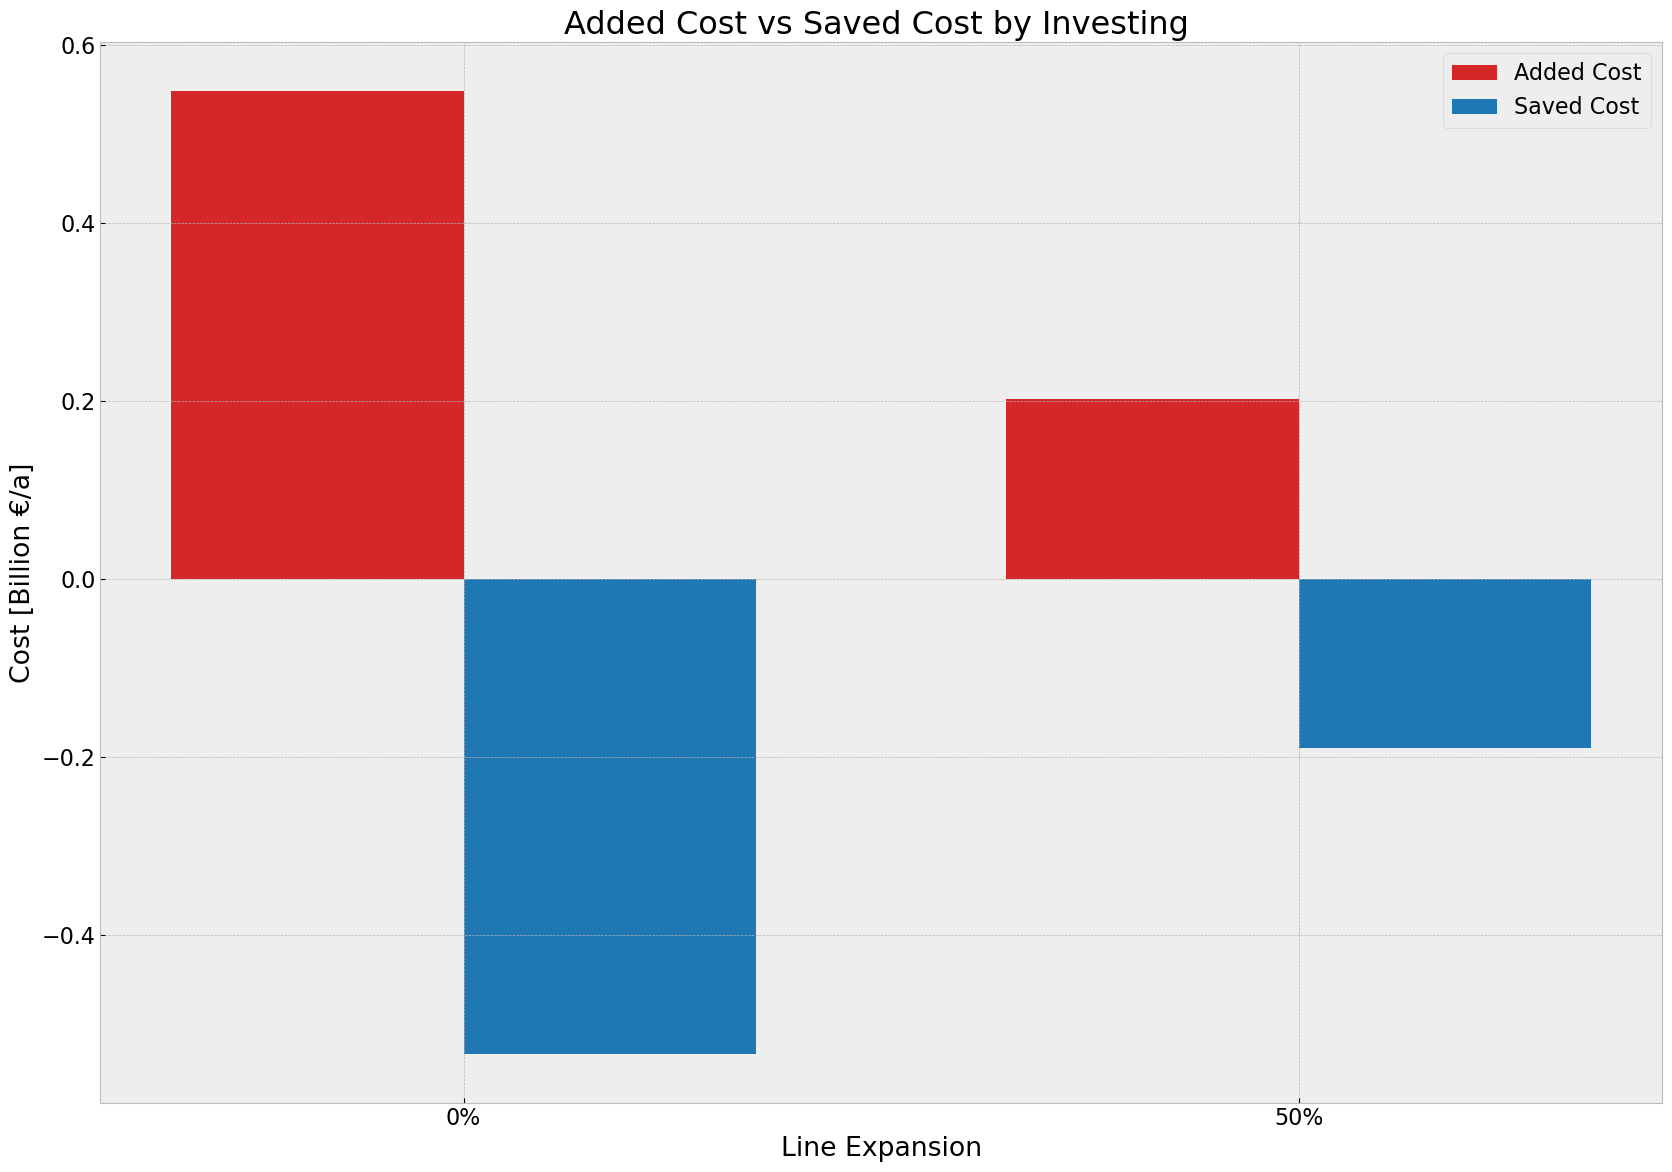

In [63]:
add_cost_RH_0_LE    = comp_system_cost.loc["Inv RH 0 LE"].sum()-comp_system_cost.loc["Base RH 0 LE"].sum()
saved_cost_RH_0_LE  = comp_system_cost.loc["Noinv RH 0 LE"].sum()-comp_system_cost.loc["Inv RH 0 LE"].sum()
add_cost_RH_50_LE   = comp_system_cost.loc["Inv RH 50% LE"].sum()-comp_system_cost.loc["Base RH 50% LE"].sum()
saved_cost_RH_50_LE = comp_system_cost.loc["Noinv RH 50% LE"].sum()-comp_system_cost.loc["Inv RH 50% LE"].sum()

cost_comparison = {
    'LE'         : ['0%', '50%'],
    'Added Cost' : [add_cost_RH_0_LE, add_cost_RH_50_LE],
    'Saved Cost' : [saved_cost_RH_0_LE, saved_cost_RH_50_LE]
}

cost_comparison_df = pd.DataFrame(cost_comparison, index = [cost_comparison['LE']])

# Number of categories and groups
LE = cost_comparison_df['LE']
add_cost = cost_comparison_df['Added Cost']
sav_cost = cost_comparison_df['Saved Cost']


# Number of categories and groups
bar_width = 0.35
indices = np.arange(len(LE))
pos_addcost = indices - 0.5*bar_width
pos_savcost = indices + 0.5*bar_width

# Plot
fig, ax = plt.subplots(figsize=(17, 12))

# Create bars
addcost = ax.bar(pos_addcost, add_cost, width=bar_width, label='Added Cost', color = '#d62728')
savcost = ax.bar(pos_savcost, sav_cost, width=bar_width, label='Saved Cost', color = '#1f77b4')

# Add labels
ax.set_xlabel('Line Expansion')
ax.set_ylabel('Cost [Billion €/a]')
ax.set_title('Added Cost vs Saved Cost by Investing ')
ax.set_xticks(indices)
ax.set_xticklabels(LE)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

# Emission

In [64]:
def em_table(n):
    carrier = n.generators.carrier.unique()
    df_tot_generation = n.generators_t.p.sum()
    region = n.generators.bus.unique()
    generations = pd.Series(index = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

    for r in region:
        for tech in carrier:
            key = f"{r} {tech}"
            if key in df_tot_generation.index:
                try:
                    generations.loc[r, tech] = df_tot_generation[key]
                    #print(generations.loc[r, tech])
                except KeyError:
                    print('error')
    generations.fillna(0, inplace=True)

    generations = (generations.unstack())#MWh

    #mean efficiency of each carrier
    eff = n.generators.groupby('carrier').efficiency.mean()

    e = generations.sum()
    emission = []

    for index in e.index:
        for index_c in n.carriers.index:
            for index_eff in eff.index:
                if index == index_c == index_eff:
                    em = n.carriers.loc[index_c,"co2_emissions"]
                    emission.append(em)

    df = e.to_frame()
    df.rename(columns={0: 'Generation in MWh'}, inplace=True)
    df['efficiency'] = eff
    df['emissions in Tonnes CO2/MWh'] = emission
    df['emissions in Tonnes CO2']= df['Generation in MWh']/df['efficiency']*df['emissions in Tonnes CO2/MWh']
    df['emissions in Tonnes CO2'].sum() 
    return df

In [65]:
#calculate the system cost for base RH, inv RH, and noinv RH models
for i in mod_names:
    if 'roll' in i and (i.endswith('roll_solved') or (reductionto in i and str(duration) in i)):
        globals()[f'emission_{i}'] = em_table(globals()[i])

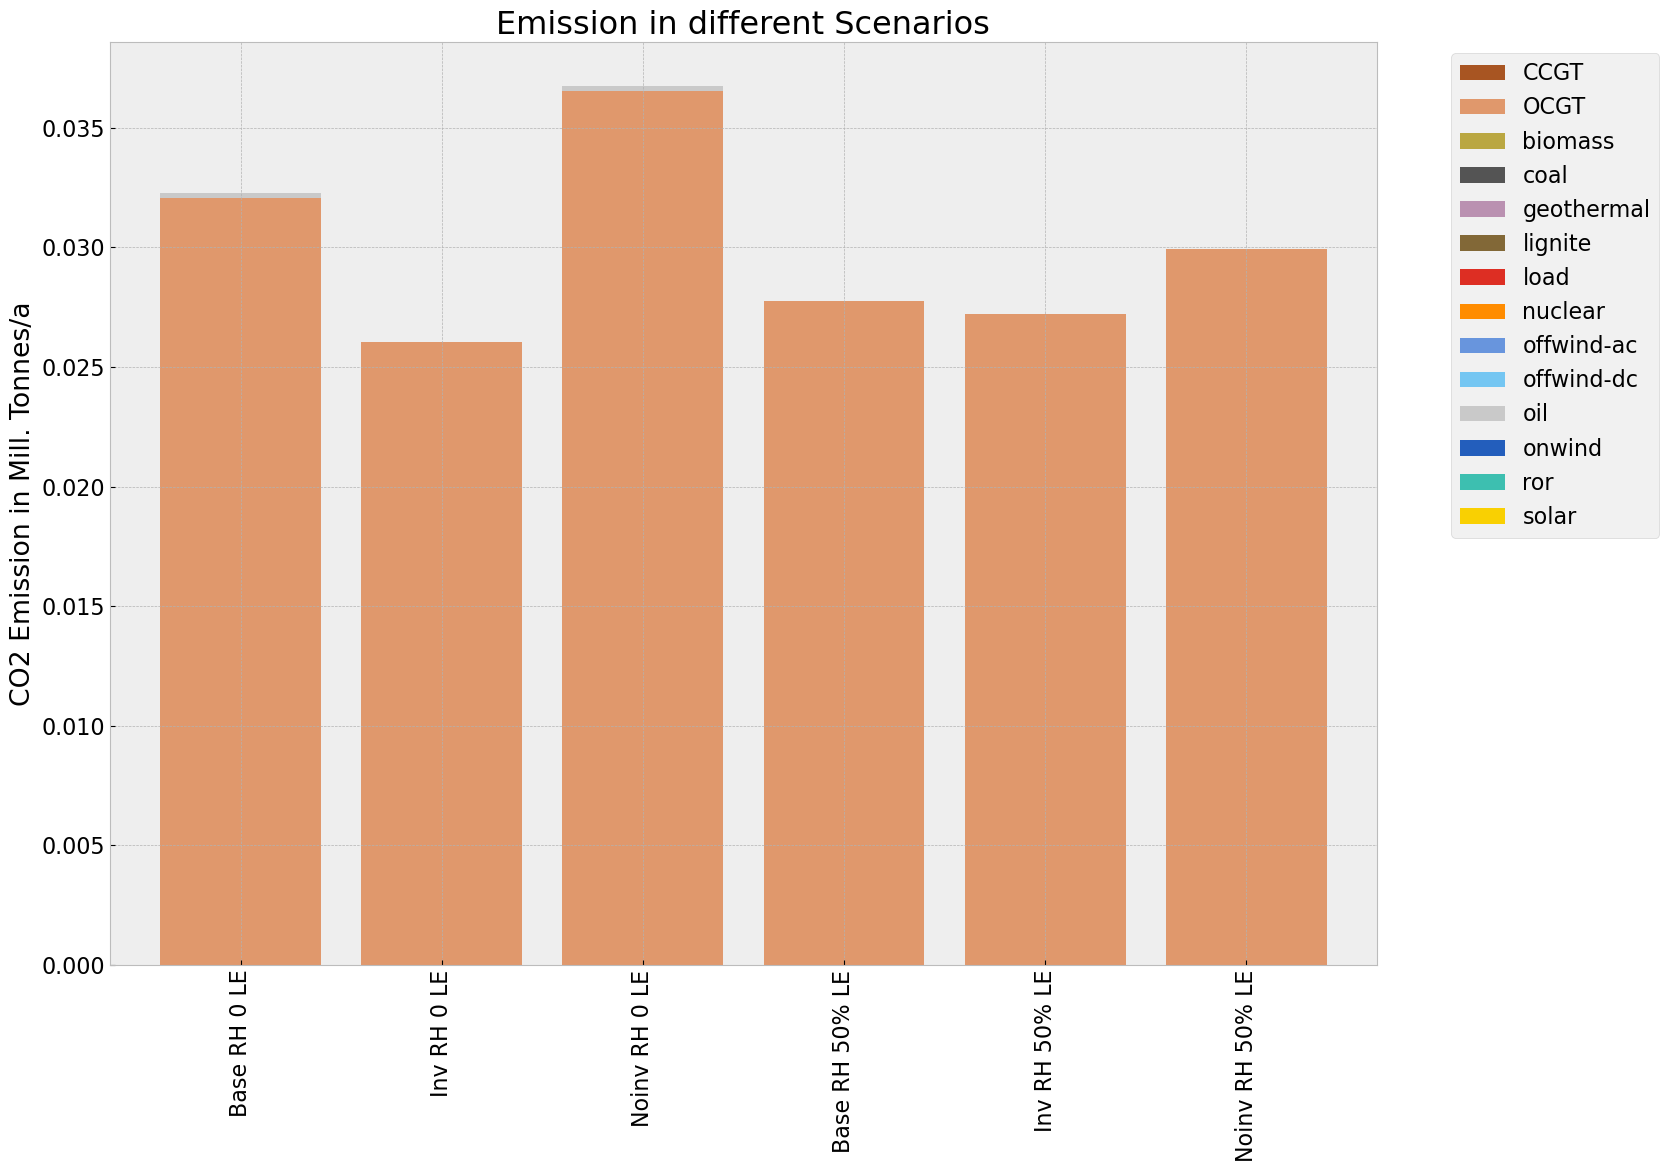

In [66]:
tech_comp = globals()[f'emission_{country}_{buses}_1_0_base_roll_solved'].index.tolist()
comp_system_em = pd.DataFrame(columns =tech_comp)

comp_system_em.loc["Base RH 0 LE"]    = globals()[f'emission_{country}_{buses}_1_0_base_roll_solved']['emissions in Tonnes CO2']/(1e6) #Mill.Tonnes CO2/a
comp_system_em.loc["Inv RH 0 LE"]     = globals()[f'emission_{country}_{buses}_1_0_{scenario}_{reductionto}_{duration}_invroll']['emissions in Tonnes CO2']/(1e6) #Mill.Tonnes CO2/a
comp_system_em.loc["Noinv RH 0 LE"]   = globals()[f'emission_{country}_{buses}_1_0_{scenario}_{reductionto}_{duration}_noinvroll']['emissions in Tonnes CO2']/(1e6) #Mill.Tonnes CO2/a
comp_system_em.loc["Base RH 50% LE"]  = globals()[f'emission_{country}_{buses}_1_5_base_roll_solved']['emissions in Tonnes CO2']/(1e6) #Mill.Tonnes CO2/a
comp_system_em.loc["Inv RH 50% LE"]   = globals()[f'emission_{country}_{buses}_1_5_{scenario}_{reductionto}_{duration}_invroll']['emissions in Tonnes CO2']/(1e6) #Mill.Tonnes CO2/a
comp_system_em.loc["Noinv RH 50% LE"] = globals()[f'emission_{country}_{buses}_1_5_{scenario}_{reductionto}_{duration}_noinvroll']['emissions in Tonnes CO2']/(1e6) #Mill.Tonnes CO2/a

comp_system_em.fillna(0, inplace=True)

comp_system_em.plot.bar(figsize=(17,12),
                        color=color_map,
                        grid=True,
                        stacked=True,
                        ylabel="CO2 Emission in Mill. Tonnes/a",
                        xlabel="",
                        title=f"Emission in different Scenarios",
                        #xlim=[0,100],
                        width=0.8
)
#global_constraint
#plt.axvline(x=n.global_constraints.loc['CO2Limit','constant']/1e6, color='r', linestyle='-', linewidth=2, label='CO2 cap')
# Move legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save plot to the current working directory
filename = "analysis_emission.png"
output_path = os.path.join(os.getcwd(), filename)
plt.savefig(output_path)
plt.show()

# Sensitivity Analysis

In [73]:
sens_reductionto

[0.75, 0.5, 0.0]

In [74]:
sens_reductionto = [round(red_int + red_dev,2) ,red_int, (0 if red_int-red_dev== 0.0 else round(red_int-red_dev,2))]
sens_duration    = [int(duration-dur_dev ), duration, int(duration + dur_dev)]
lines            = ['1_0', '1_5']
models           = ['inv', 'noinv', 'noinvroll', 'invroll']

In [75]:
for lin in lines:
    #calc system cost for base models    
    name_base = f'{country}_{buses}_{lin}_base_roll_solved'
    globals()[f'system_cost_{name_base}'] = system_cost(globals()[name_base], country).sum()
    globals()[f'system_cost_tot_{name_base}'] = system_cost_tot(globals()[name_base]).sum()

    for red in sens_reductionto:
        for dur in sens_duration:        
            for mod in models:
                # Sanitize the names to be valid Python variable names
                red_sanitized = sanitize_variable_name(str(red))
                dur_sanitized = sanitize_variable_name(str(dur))
                
                # Variable names for models
                mod_name = f'{country}_{buses}_{lin}_{scenario}_{red_sanitized}_{dur_sanitized}_{mod}' 
                # calculate system cost
                globals()[f'system_cost_{mod_name}'] = system_cost(globals()[mod_name], country).sum()
                globals()[f'system_cost_tot_{mod_name}'] = system_cost_tot(globals()[mod_name]).sum()
                #globals()[f'system_cost_{mod_name}'] = system_cost(model) #million€/a

                if mod == 'invroll' or mod == 'noinvroll':
                    try:
                        # calc saved cost
                        globals()[f'saved_cost_{country}_{buses}_{lin}_{scenario}_{red_sanitized}_{dur_sanitized}'] = (globals()[f'system_cost_{country}_{buses}_{lin}_{scenario}_{red_sanitized}_{dur_sanitized}_noinvroll'] - 
                                                                                                                           globals()[f'system_cost_{country}_{buses}_{lin}_{scenario}_{red_sanitized}_{dur_sanitized}_invroll'])
                        globals()[f'saved_cost_tot_{country}_{buses}_{lin}_{scenario}_{red_sanitized}_{dur_sanitized}'] = (globals()[f'system_cost_tot_{country}_{buses}_{lin}_{scenario}_{red_sanitized}_{dur_sanitized}_noinvroll'] - 
                                                                                                                           globals()[f'system_cost_tot_{country}_{buses}_{lin}_{scenario}_{red_sanitized}_{dur_sanitized}_invroll'])      

                        #calc additional investment cost
                        globals()[f'add_cost_{country}_{buses}_{lin}_{scenario}_{red_sanitized}_{dur_sanitized}'] = (globals()[f'system_cost_{country}_{buses}_{lin}_{scenario}_{red_sanitized}_{dur_sanitized}_invroll']- 
                                                                                                                          globals()[f'system_cost_{name_base}'])
                        globals()[f'add_cost_tot_{country}_{buses}_{lin}_{scenario}_{red_sanitized}_{dur_sanitized}'] = (globals()[f'system_cost_tot_{country}_{buses}_{lin}_{scenario}_{red_sanitized}_{dur_sanitized}_invroll']- 
                                                                                                                          globals()[f'system_cost_tot_{name_base}'])                                                                                                
                    except KeyError as e:
                        print(f"KeyError: {e} not found in globals()")

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior,

KeyError: 'system_cost_ES_8_1_5_wind_0_75_90_invroll' not found in globals()


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior,

KeyError: 'system_cost_ES_8_1_5_wind_0_75_180_invroll' not found in globals()


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior,

KeyError: 'system_cost_ES_8_1_5_wind_0_75_270_invroll' not found in globals()


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior,

KeyError: 'system_cost_ES_8_1_5_wind_0_5_90_invroll' not found in globals()


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior,

KeyError: 'system_cost_ES_8_1_5_wind_0_5_270_invroll' not found in globals()


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior,

KeyError: 'system_cost_ES_8_1_5_wind_0_25_90_invroll' not found in globals()


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior,

KeyError: 'system_cost_ES_8_1_5_wind_0_25_180_invroll' not found in globals()


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior,

KeyError: 'system_cost_ES_8_1_5_wind_0_25_270_invroll' not found in globals()


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_17616\1260646682.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_df = cost_df.fillna(0)


In [76]:
for lin in lines:
    globals()[f'cost_{lin}_df'] = pd.DataFrame(index = sens_reductionto)
    globals()[f'cost_{lin}_tot_df'] = pd.DataFrame(index = sens_reductionto)

    #globals()[f'cost_{lin}_df'][f'saved cost (dur: {i} days)'] = pd.NA
    for red in sens_reductionto:
        for dur in sens_duration:        
            for mod in models:
                

                # Sanitize the names to be valid Python variable names
                red_sanitized = sanitize_variable_name(str(red))
                dur_sanitized = sanitize_variable_name(str(dur))

                #add saved to table
                globals()[f'cost_{lin}_df'].loc[red,f'saved cost (dur: {dur_sanitized} days)'] = globals()[f'saved_cost_{country}_{buses}_{lin}_{scenario}_{red_sanitized}_{dur_sanitized}']
                globals()[f'cost_{lin}_tot_df'].loc[red,f'saved cost (dur: {dur_sanitized} days)'] = globals()[f'saved_cost_tot_{country}_{buses}_{lin}_{scenario}_{red_sanitized}_{dur_sanitized}']
                
for lin in lines:
    #globals()[f'cost_{lin}_df'][f'added cost (dur: {i} days)'] = pd.NA
    for dur in sens_duration:
        for red in sens_reductionto:        
            for mod in models:
                

                # Sanitize the names to be valid Python variable names
                red_sanitized = sanitize_variable_name(str(red))
                dur_sanitized = sanitize_variable_name(str(dur))

                #add add cost to table
                globals()[f'cost_{lin}_df'].loc[red,f'added cost (dur: {dur_sanitized} days)'] = globals()[f'add_cost_{country}_{buses}_{lin}_{scenario}_{red_sanitized}_{dur_sanitized}']
                globals()[f'cost_{lin}_tot_df'].loc[red,f'added cost (dur: {dur_sanitized} days)'] = globals()[f'add_cost_tot_{country}_{buses}_{lin}_{scenario}_{red_sanitized}_{dur_sanitized}']

        #calculate savedcost-addcost (positive means feasible investment and vice versa)
        globals()[f'cost_{lin}_df'][f'inv value (dur: {dur} days)'] = globals()[f'cost_{lin}_df'][f'saved cost (dur: {dur} days)']-globals()[f'cost_{lin}_df'][f'added cost (dur: {dur} days)']
        globals()[f'cost_{lin}_tot_df'][f'inv value (dur: {dur} days)'] = globals()[f'cost_{lin}_tot_df'][f'saved cost (dur: {dur} days)']-globals()[f'cost_{lin}_tot_df'][f'added cost (dur: {dur} days)']
    
    new_index = [(x - 1) * -100 for x in sens_reductionto]
    globals()[f'cost_{lin}_df'].index = new_index
    globals()[f'cost_{lin}_tot_df'].index = new_index
                

In [79]:
cost_1_0_df

,saved cost (dur: 90 days),saved cost (dur: 180 days),saved cost (dur: 270 days),added cost (dur: 90 days),inv value (dur: 90 days),added cost (dur: 180 days),inv value (dur: 180 days),added cost (dur: 270 days),inv value (dur: 270 days)
25.0,-0.361185,-0.361197,-0.361115,0.366581,-0.727766,0.366724,-0.727921,0.366906,-0.728021
50.0,-0.534131,-0.534155,-0.533992,0.548386,-1.082517,0.548672,-1.082827,0.549034,-1.083027
75.0,-0.713261,-0.713279,-0.713034,0.742186,-1.455447,0.742596,-1.455875,0.743141,-1.456175


## Saved cost vs added cost when investing in generators, storage units or transmission lines in models with 0% LE and 50% LE

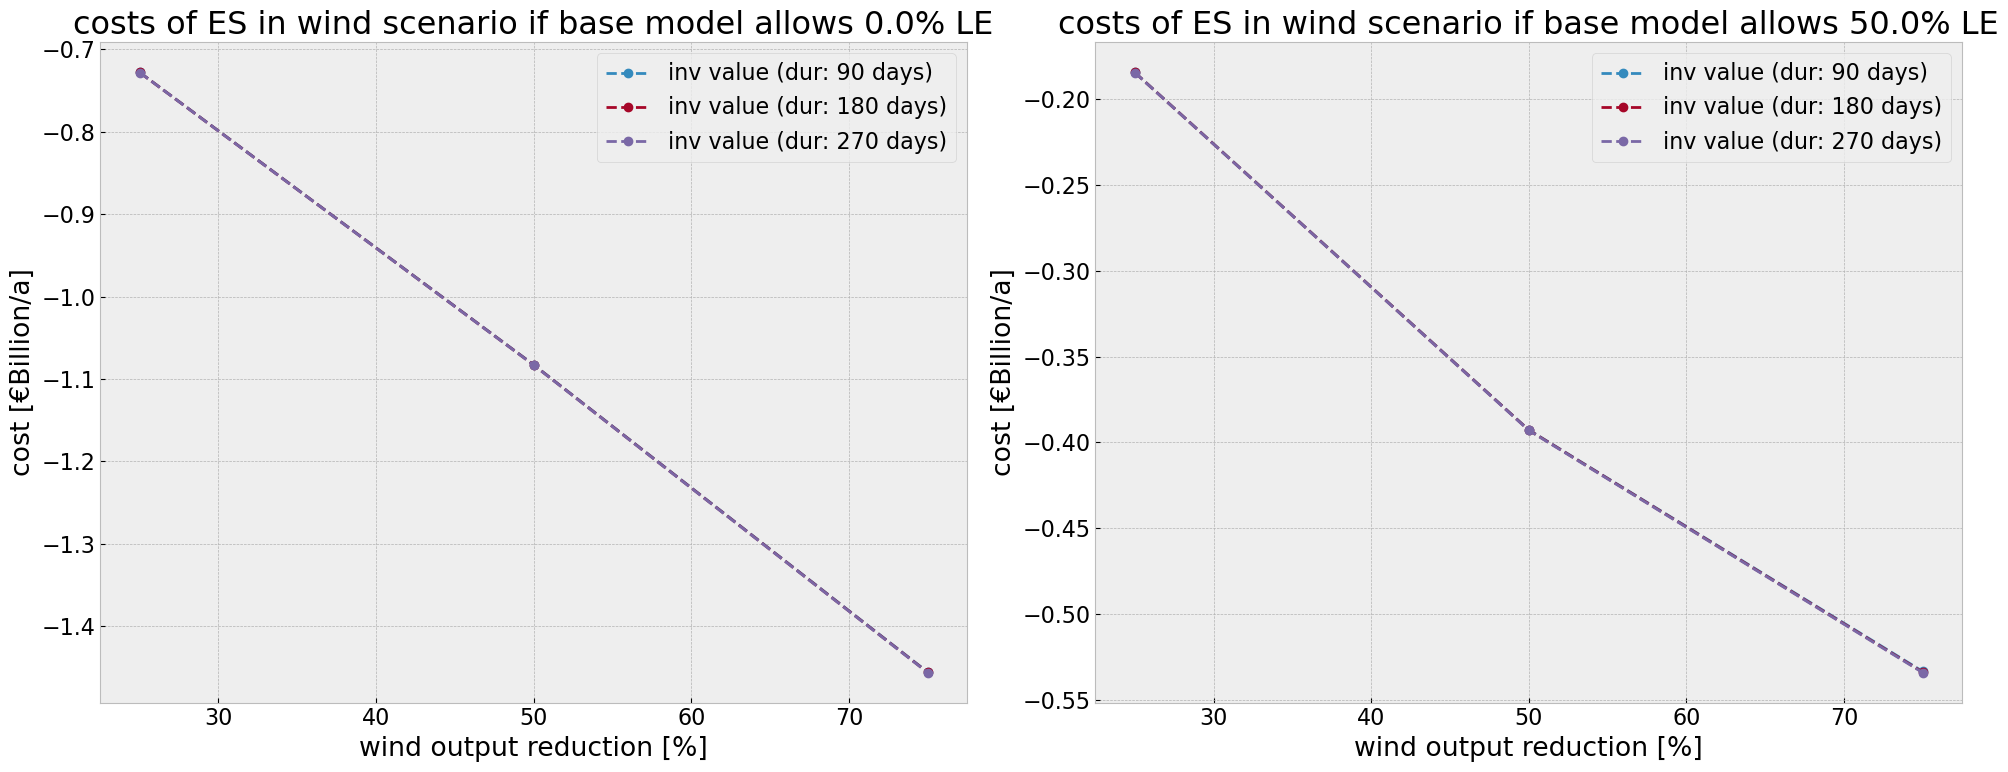

In [77]:
# Define a dictionary to map each element to a specific subplot
element_to_ax = {element: i for i, element in enumerate([1.0, 1.5])}

# Plot configuration
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(20, 8))

# Variable to store handles and labels for the legend
handles = []
labels = []

# Plotting each element in its corresponding subplot
for e, i in element_to_ax.items():
    ax = axes[i]
    e_san = sanitize_variable_name(str(e))
    for column in globals()[f'cost_{e_san}_df'].columns:
        if 'inv value' in column:
                ax.plot(globals()[f'cost_{e_san}_df'].index, globals()[f'cost_{e_san}_df'][column], marker='o', linestyle = '--',label=column)

    # Add labels and legend
    ax.set_xlabel(f'{scenario} output reduction [%]')
    ax.set_ylabel('cost [€Billion/a]')
    ax.set_title(f'costs of {country} in {scenario} scenario if base model allows {str((e-1)*100)}% LE')
    ax.legend()

plt.tight_layout()  # Adjust layout to make room for labels

# Save plot to the current working directory
filename = f"sens_saved_cost_{country}.png"
output_path = os.path.join(os.getcwd(), filename)
plt.savefig(output_path)

plt.show()




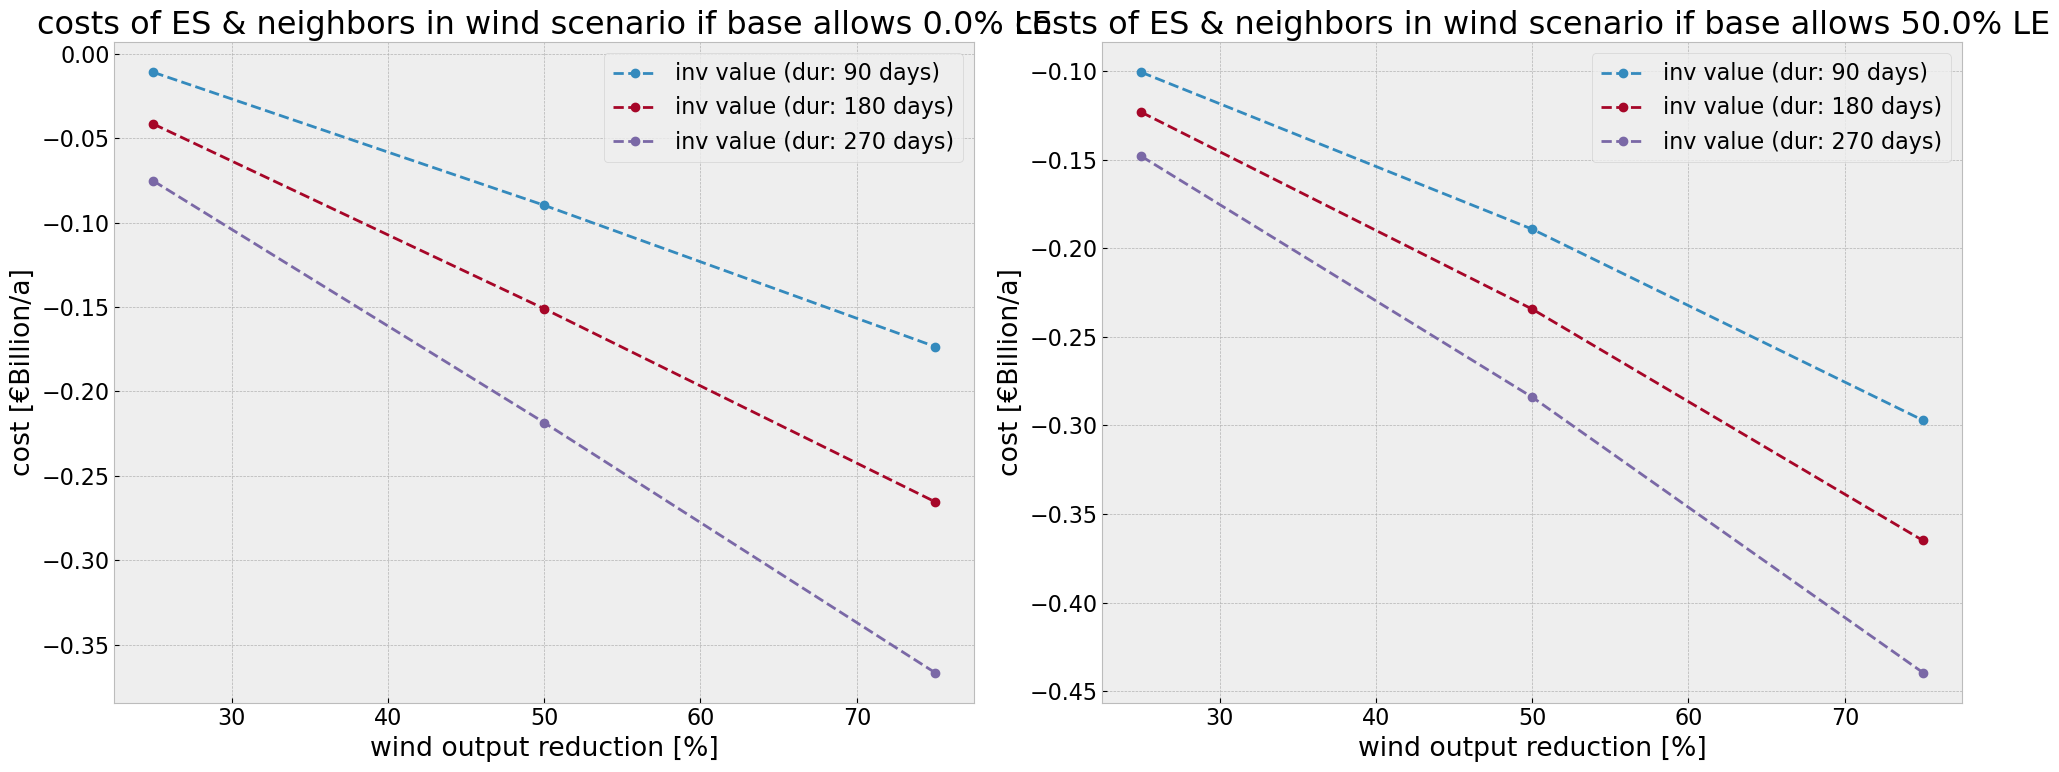

In [78]:
# Define a dictionary to map each element to a specific subplot
element_to_ax = {element: i for i, element in enumerate([1.0, 1.5])}

# Plot configuration
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(20, 8))

# Variable to store handles and labels for the legend
handles = []
labels = []

# Plotting each element in its corresponding subplot
for e, i in element_to_ax.items():
    ax = axes[i]
    e_san = sanitize_variable_name(str(e))
    for column in globals()[f'cost_{e_san}_tot_df'].columns:
        if 'inv value' in column:
                ax.plot(globals()[f'cost_{e_san}_tot_df'].index, globals()[f'cost_{e_san}_tot_df'][column], marker='o', linestyle = '--',label=column)

    # Add labels and legend
    ax.set_xlabel(f'{scenario} output reduction [%]')
    ax.set_ylabel('cost [€Billion/a]')
    ax.set_title(f'costs of {country} & neighbors in {scenario} scenario if base allows {str((e-1)*100)}% LE')
    ax.legend()

plt.tight_layout()  # Adjust layout to make room for labels

# Save plot to the current working directory
filename = f"sens_saved_cost.png"
output_path = os.path.join(os.getcwd(), filename)
plt.savefig(output_path)

plt.show()